Type: <class 'dict'>
Length: 1046

Sample key-value pairs:
0: 0
1037: 1
2158: 2
2003: 3
15927: 4
1999: 5
2601: 6
3061: 7
1996: 8
2690: 9


/project/ag-jafra/Souptik/CMG_New/Experiments/envs/CMG_new/lib/python3.10/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



Sample tokens:
ID 0 → Token '[PAD]' → Custom index 0
ID 1037 → Token 'a' → Custom index 1
ID 2158 → Token 'man' → Custom index 2
ID 2003 → Token 'is' → Custom index 3
ID 15927 → Token 'crawling' → Custom index 4
ID 1999 → Token 'in' → Custom index 5
ID 2601 → Token 'dark' → Custom index 6
ID 3061 → Token 'standing' → Custom index 7
ID 1996 → Token 'the' → Custom index 8
ID 2690 → Token 'middle' → Custom index 9

Value distribution:
count    1046.000000
mean      522.500000
std       302.098494
min         0.000000
25%       261.250000
50%       522.500000
75%       783.750000
max      1045.000000
Name: values, dtype: float64


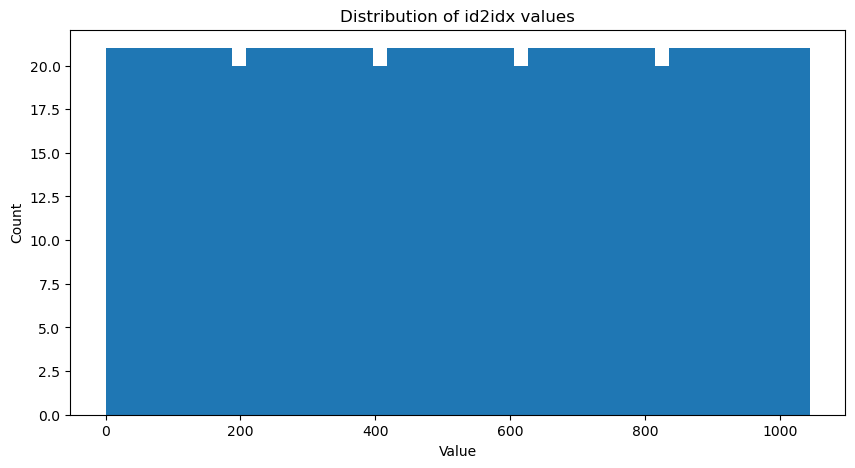

In [1]:
import pickle
import pandas as pd

# Load the pickle file
with open('/project/ag-jafra/Souptik/VGGSoundAVEL/CMG/cnt.pkl', 'rb') as fp:
    id2idx = pickle.load(fp)

# Print the type and length of the dictionary
print(f"Type: {type(id2idx)}")
print(f"Length: {len(id2idx)}")

# Show some example entries
print("\nSample key-value pairs:")
items = list(id2idx.items())[:10]  # First 10 items
for key, value in items:
    print(f"{key}: {value}")

# If it's a dictionary mapping from BERT token IDs to custom indices
# Let's try to see what some of the tokens are
if isinstance(list(id2idx.keys())[0], int):  # Checking if keys are integers
    from transformers import BertTokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    
    print("\nSample tokens:")
    for token_id, idx in items:
        token = tokenizer.convert_ids_to_tokens(token_id)
        print(f"ID {token_id} → Token '{token}' → Custom index {idx}")

# Distribution of values if it's a mapping
if isinstance(list(id2idx.values())[0], int):  # Checking if values are integers
    values = list(id2idx.values())
    df = pd.DataFrame({'values': values})
    print("\nValue distribution:")
    print(df['values'].describe())
    
    # Optional: histogram of value distribution
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 5))
        plt.hist(values, bins=50)
        plt.title('Distribution of id2idx values')
        plt.xlabel('Value')
        plt.ylabel('Count')
        plt.show()
    except ImportError:
        print("Matplotlib not available for histogram")

In [2]:
import torch

# Create a sample tensor similar to what we'd have after multiplication
# Shape: [batch*time, spatial, channels] = [6, 49, 512]
batch_time = 6
spatial = 49
channels = 512

# Create a random tensor with these dimensions
tensor = torch.rand(batch_time, spatial, channels)  # This is already a float tensor by default

print("Original tensor shape:", tensor.shape)

# Apply mean operation without keepdim (default behavior)
result_without_keepdim = tensor.mean(-2)
print("After mean(-2) without keepdim:", result_without_keepdim.shape)

# Apply mean operation with keepdim=True
result_with_keepdim = tensor.mean(-2, keepdim=True)
print("After mean(-2) with keepdim=True:", result_with_keepdim.shape)

# We can also verify this with a much smaller tensor for clarity
# Make sure to use float data type
small_tensor = torch.tensor([
    [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]],  # First batch item
    [[10.0, 11.0, 12.0], [13.0, 14.0, 15.0], [16.0, 17.0, 18.0]]  # Second batch item
], dtype=torch.float32)  # Explicitly set float data type

print("\nSmall tensor shape:", small_tensor.shape)  # Should be [2, 3, 3]

# Calculate mean across the middle dimension (dimension 1, or -2)
small_result_without_keepdim = small_tensor.mean(-2)
print("Small tensor after mean(-2):", small_result_without_keepdim.shape)
print("Values:")
print(small_result_without_keepdim)

# With keepdim=True
small_result_with_keepdim = small_tensor.mean(-2, keepdim=True)
print("\nSmall tensor after mean(-2, keepdim=True):", small_result_with_keepdim.shape)
print("Values:")
print(small_result_with_keepdim)

Original tensor shape: torch.Size([6, 49, 512])
After mean(-2) without keepdim: torch.Size([6, 512])
After mean(-2) with keepdim=True: torch.Size([6, 1, 512])

Small tensor shape: torch.Size([2, 3, 3])
Small tensor after mean(-2): torch.Size([2, 3])
Values:
tensor([[ 4.,  5.,  6.],
        [13., 14., 15.]])

Small tensor after mean(-2, keepdim=True): torch.Size([2, 1, 3])
Values:
tensor([[[ 4.,  5.,  6.]],

        [[13., 14., 15.]]])


In [4]:
import pandas as pd
import os

# Read the CSV file
csv_path = '/project/ag-jafra/Souptik/VGGSoundAVEL/Data/vggsound-avel100k-new.csv'
df = pd.read_csv(csv_path)

# Filter for only train and validation splits
train_val_df = df[df['split'].isin(['train', 'val'])]

# Count videos per category
category_counts = train_val_df.groupby('category').size().sort_values(ascending=False)

# Make sure the directory exists
os.makedirs(os.path.dirname('/project/ag-jafra/Souptik/CMG_New/Experiments/Misc/classtats.txt'), exist_ok=True)

# Save to file using a different approach
with open('/project/ag-jafra/Souptik/CMG_New/Experiments/Misc/classtats.txt', 'w') as f:
    for category, count in category_counts.items():
        f.write(f"{category}: {count}\n")

print(f"Saved counts for {len(category_counts)} categories to classtats.txt")

Saved counts for 141 categories to classtats.txt


In [5]:
import pandas as pd
import os

# Read the CSV file
csv_path = '/project/ag-jafra/Souptik/VGGSoundAVEL/Data/vggsound-avel100k-new.csv'
df = pd.read_csv(csv_path)

# Filter for the different splits
train_val_df = df[df['split'].isin(['train', 'val'])]
test_df = df[df['split'] == 'test']

# Count videos per category for each split
train_val_counts = train_val_df.groupby('category').size()
test_counts = test_df.groupby('category').size()

# Combine the counts into a single DataFrame
all_counts = pd.DataFrame({
    'train_val': train_val_counts,
    'test': test_counts
})

# Fill any missing values with 0 (categories that might not appear in all splits)
all_counts = all_counts.fillna(0).astype(int)

# Sort by train_val count in descending order
all_counts = all_counts.sort_values('train_val', ascending=False)

# Make sure the directory exists
os.makedirs(os.path.dirname('/project/ag-jafra/Souptik/CMG_New/Experiments/Misc/classtats1.txt'), exist_ok=True)

# Save to file with both counts
with open('/project/ag-jafra/Souptik/CMG_New/Experiments/Misc/classtats1.txt', 'w') as f:
    for category, row in all_counts.iterrows():
        f.write(f"{category}: {row['train_val']} (train+val), {row['test']} (test)\n")

print(f"Saved counts for {len(all_counts)} categories to classtats1.txt")

# Display a few examples in the notebook
print("\nSample of category counts (top 10):")
print(all_counts.head(10))

Saved counts for 141 categories to classtats1.txt

Sample of category counts (top 10):
                         train_val  test
category                                
playing acoustic guitar        762   134
playing marimba                749   187
engine accelerating            749   192
people crowd                   742   142
helicopter                     738   185
playing flute                  726   160
fireworks banging              725   156
chainsawing trees              724   154
female speech                  722   143
playing banjo                  710   195


In [6]:
import pandas as pd

# Read the CSV file containing video information
csv_path = '/project/ag-jafra/Souptik/VGGSoundAVEL/Data/vggsound-avel100k-new.csv'
df = pd.read_csv(csv_path)

# Count the total number of videos in the entire dataset
total_videos = len(df)
print(f"Total number of videos in dataset: {total_videos}")

# Count the videos in each split for additional context
train_count = len(df[df['split'] == 'train'])
val_count = len(df[df['split'] == 'val'])
test_count = len(df[df['split'] == 'test'])

# Print the breakdowns by split
print(f"Training videos: {train_count}")
print(f"Validation videos: {val_count}")
print(f"Test videos: {test_count}")
print(f"Train + Validation videos: {train_count + val_count}")

# Verify our counts add up correctly (sanity check)
if total_videos == train_count + val_count + test_count:
    print("✓ All videos accounted for!")
else:
    print("! Warning: Split counts don't add up to total (check for missing split values)")

Total number of videos in dataset: 87323
Training videos: 53598
Validation videos: 16858
Test videos: 16867
Train + Validation videos: 70456
✓ All videos accounted for!


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

# Create sample weights for a single array
n_embeddings = 1  # Just checking one array

# Initialize modality weights
log_ratio = math.log(0.8/0.2)  # Should be around 1.386
init_modality_weights = torch.zeros(n_embeddings, 4)
init_modality_weights[:, 0] = log_ratio  # v->v weights
init_modality_weights[:, 3] = log_ratio  # a->a weights
modality_weights = init_modality_weights

# Initialize hierarchical weights
logit_01 = math.log(0.1/(1-0.1))  # Should be around -2.2
init_hier_weights = torch.full((n_embeddings, 2), logit_01)
hierarchical_weights = init_hier_weights

# Apply transformations
modal_weights_video = F.softmax(modality_weights[:, 0:2], dim=1)
modal_weights_audio = F.softmax(modality_weights[:, 2:4], dim=1)
hier_weights_parameter = torch.sigmoid(hierarchical_weights)

# Print results
print("Expected values:")
print("- Video modality weights: [0.8, 0.2]")
print("- Audio modality weights: [0.2, 0.8]")
print("- Hierarchical weights: [0.1, 0.1]")
print("\nActual values:")
print(f"- Video modality weights: [{modal_weights_video[0,0]:.4f}, {modal_weights_video[0,1]:.4f}]")
print(f"- Audio modality weights: [{modal_weights_audio[0,0]:.4f}, {modal_weights_audio[0,1]:.4f}]")
print(f"- Hierarchical weights: [{hier_weights_parameter[0,0]:.4f}, {hier_weights_parameter[0,1]:.4f}]")

Expected values:
- Video modality weights: [0.8, 0.2]
- Audio modality weights: [0.2, 0.8]
- Hierarchical weights: [0.1, 0.1]

Actual values:
- Video modality weights: [0.8000, 0.2000]
- Audio modality weights: [0.2000, 0.8000]
- Hierarchical weights: [0.1000, 0.1000]


v_flat shape: torch.Size([6, 4])
Video embedding shape: torch.Size([5, 4])
Audio embedding shape: torch.Size([5, 4])

First few vectors after split:
Original embedding[0]: tensor([ 1.,  2.,  3.,  4., -1., -2., -3., -4.])
Video embedding[0]: tensor([1., 2., 3., 4.])
Audio embedding[0]: tensor([-1., -2., -3., -4.])

Step 1: Calculating distances
v_distances shape: torch.Size([6, 5])
First row of v_distances: tensor([ 0.0400, 26.4400, 16.4400,  5.6400, 22.6400])

Step 2: Finding nearest vectors
v_indices: tensor([0, 2, 3, 4, 1, 3])
a_indices: tensor([0, 2, 3, 4, 1, 3])

Step 3: Creating one-hot encodings
v_encodings shape: torch.Size([6, 5])
First row of v_encodings: tensor([1., 0., 0., 0., 0.])

Step 4: Quantizing features
v_quantized_segment shape: torch.Size([6, 4])
First row of v_quantized_segment: tensor([1., 2., 3., 4.])
Reshaped v_quantized_segment shape: torch.Size([2, 3, 4])
v_full_vectors shape: torch.Size([6, 8])
First row of v_full_vectors: tensor([ 1.,  2.,  3.,  4., -1., -2.

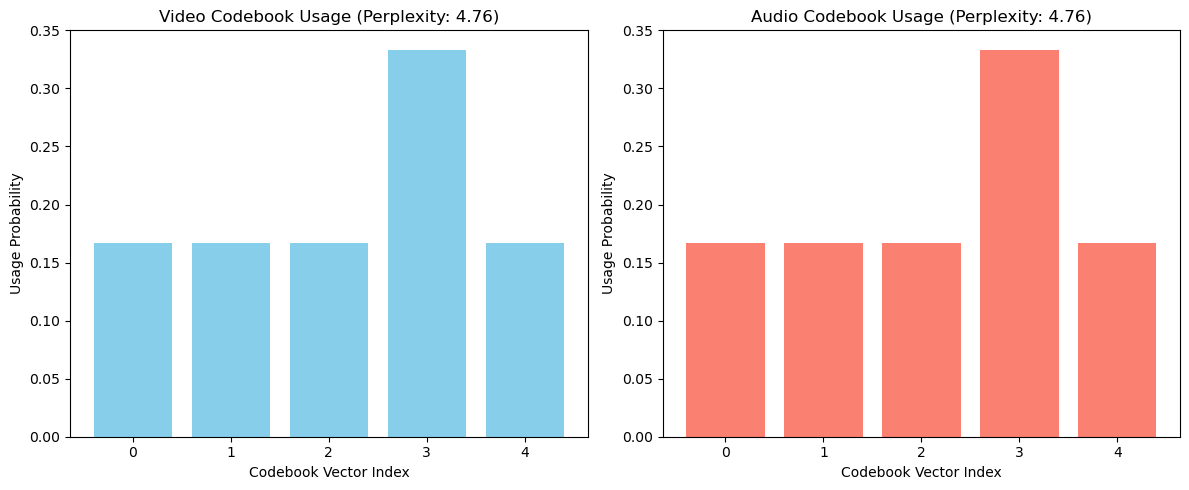

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Create small dummy variables for testing
B = 2  # Batch size
T = 3  # Time steps
D = 4  # Feature dimension per modality
M = 5  # Number of codebook vectors
D_total = D * 2  # Total embedding dimension (video + audio)

# Create a dummy codebook
np.random.seed(42)  # For reproducibility
embedding = torch.tensor([
    [1.0, 2.0, 3.0, 4.0, -1.0, -2.0, -3.0, -4.0],  # Vector 0
    [2.0, 0.0, 1.0, 0.0, -2.0, 0.0, -1.0, 0.0],    # Vector 1
    [0.0, 1.0, 0.0, 2.0, 0.0, -1.0, 0.0, -2.0],    # Vector 2
    [3.0, 3.0, 3.0, 3.0, -3.0, -3.0, -3.0, -3.0],  # Vector 3
    [0.5, 0.5, 0.5, 0.5, -0.5, -0.5, -0.5, -0.5]   # Vector 4
], dtype=torch.float)

# Create dummy encoder outputs
video_semantic = torch.tensor([
    # Batch 0
    [[1.1, 2.1, 3.1, 4.1],   # Time 0
     [0.1, 0.9, 0.1, 1.9],   # Time 1
     [2.9, 2.9, 2.9, 2.9]],  # Time 2
    # Batch 1
    [[0.4, 0.4, 0.4, 0.4],   # Time 0
     [2.9, 0.1, 0.9, 0.1],   # Time 1
     [3.1, 3.1, 3.1, 3.1]]   # Time 2
], dtype=torch.float)

audio_semantic = torch.tensor([
    # Batch 0
    [[-0.9, -1.9, -2.9, -3.9],  # Time 0
     [0.0, -0.9, 0.0, -1.9],    # Time 1
     [-2.9, -2.9, -2.9, -2.9]], # Time 2
    # Batch 1
    [[-0.4, -0.4, -0.4, -0.4],  # Time 0
     [-1.9, -0.1, -0.9, -0.1],  # Time 1
     [-2.9, -2.9, -2.9, -2.9]]  # Time 2
], dtype=torch.float)

# Reshape for distance calculation
v_flat = video_semantic.reshape(-1, D)  # [BxT, D]
a_flat = audio_semantic.reshape(-1, D)  # [BxT, D]
print(f"v_flat shape: {v_flat.shape}")

# Split the codebook into modality segments
video_embedding = embedding[:, :D]         # First D dims for video
audio_embedding = embedding[:, D:]         # Second D dims for audio
print(f"Video embedding shape: {video_embedding.shape}")
print(f"Audio embedding shape: {audio_embedding.shape}")

# Print the first few rows to verify the split
print("\nFirst few vectors after split:")
print(f"Original embedding[0]: {embedding[0]}")
print(f"Video embedding[0]: {video_embedding[0]}")
print(f"Audio embedding[0]: {audio_embedding[0]}")

# Step 1: Calculate distances
print("\nStep 1: Calculating distances")
# Video distances
v_distances = torch.addmm(torch.sum(video_embedding ** 2, dim=1) +
                        torch.sum(v_flat ** 2, dim=1, keepdim=True),
                        v_flat, video_embedding.t(),
                        alpha=-2.0, beta=1.0)  # [BxT, M]

# Audio distances
a_distances = torch.addmm(torch.sum(audio_embedding ** 2, dim=1) +
                        torch.sum(a_flat ** 2, dim=1, keepdim=True),
                        a_flat, audio_embedding.t(),
                        alpha=-2.0, beta=1.0)  # [BxT, M]

print(f"v_distances shape: {v_distances.shape}")
print(f"First row of v_distances: {v_distances[0]}")

# Step 2: Find nearest vectors
print("\nStep 2: Finding nearest vectors")
v_indices = torch.argmin(v_distances, dim=-1)  # [BxT]
a_indices = torch.argmin(a_distances, dim=-1)  # [BxT]

print(f"v_indices: {v_indices}")
print(f"a_indices: {a_indices}")

# Step 3: Create one-hot encodings
print("\nStep 3: Creating one-hot encodings")
v_encodings = F.one_hot(v_indices, M).float()  # [BxT, M]
a_encodings = F.one_hot(a_indices, M).float()  # [BxT, M]

print(f"v_encodings shape: {v_encodings.shape}")
print(f"First row of v_encodings: {v_encodings[0]}")

# Step 4: Quantize the features
print("\nStep 4: Quantizing features")
v_quantized_segment = F.embedding(v_indices, video_embedding)  # [BxT, D]
a_quantized_segment = F.embedding(a_indices, audio_embedding)  # [BxT, D]

print(f"v_quantized_segment shape: {v_quantized_segment.shape}")
print(f"First row of v_quantized_segment: {v_quantized_segment[0]}")

# Step 5: Reshape to original dimensions
v_quantized_segment = v_quantized_segment.view_as(video_semantic)  # [B, T, D]
a_quantized_segment = a_quantized_segment.view_as(audio_semantic)  # [B, T, D]

print(f"Reshaped v_quantized_segment shape: {v_quantized_segment.shape}")

# Step 6: Get full vectors (both modalities)
v_full_vectors = F.embedding(v_indices, embedding)  # [BxT, D_total]
a_full_vectors = F.embedding(a_indices, embedding)  # [BxT, D_total]

print(f"v_full_vectors shape: {v_full_vectors.shape}")
print(f"First row of v_full_vectors: {v_full_vectors[0]}")

# Step 7: Reshape full vectors
v_full_vectors = v_full_vectors.view(B, T, D_total)  # [B, T, D_total]
a_full_vectors = a_full_vectors.view(B, T, D_total)  # [B, T, D_total]

print(f"Reshaped v_full_vectors shape: {v_full_vectors.shape}")

# Step 8: Straight-through estimator (if needed)
v_quantized_segment_ste = video_semantic + (v_quantized_segment - video_semantic).detach()
a_quantized_segment_ste = audio_semantic + (a_quantized_segment - audio_semantic).detach()

print("\nStep 8: Straight-through estimator")
print(f"v_quantized_segment_ste shape: {v_quantized_segment_ste.shape}")

# Calculate perplexity
v_avg_probs = torch.mean(v_encodings, dim=0)
v_perplexity = torch.exp(-torch.sum(v_avg_probs * torch.log(v_avg_probs + 1e-10)))
a_avg_probs = torch.mean(a_encodings, dim=0)
a_perplexity = torch.exp(-torch.sum(a_avg_probs * torch.log(a_avg_probs + 1e-10)))

print("\nCodebook usage statistics:")
print(f"v_avg_probs: {v_avg_probs}")
print(f"v_perplexity: {v_perplexity.item():.2f} (out of {M} vectors)")
print(f"a_avg_probs: {a_avg_probs}")
print(f"a_perplexity: {a_perplexity.item():.2f} (out of {M} vectors)")

# Visualize codebook usage
def plot_codebook_usage():
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.bar(range(M), v_avg_probs.numpy(), color='skyblue')
    plt.title(f'Video Codebook Usage (Perplexity: {v_perplexity.item():.2f})')
    plt.xlabel('Codebook Vector Index')
    plt.ylabel('Usage Probability')
    plt.xticks(range(M))
    
    plt.subplot(1, 2, 2)
    plt.bar(range(M), a_avg_probs.numpy(), color='salmon')
    plt.title(f'Audio Codebook Usage (Perplexity: {a_perplexity.item():.2f})')
    plt.xlabel('Codebook Vector Index')
    plt.ylabel('Usage Probability')
    plt.xticks(range(M))
    
    plt.tight_layout()
    plt.show()

# Visualize codebook usage
plot_codebook_usage()

In [3]:
import torch
import numpy as np

# Set parameters to match your model
n_embeddings = 400 
embedding_dim = 256
D_total = embedding_dim * 2  # Total embedding dimension (512)

# Initialize the codebook using your method
init_bound = 1 / 400  # Should be 0.0025
print(f"Initialization bound: {init_bound}")

# Set seed for reproducibility
torch.manual_seed(123)
# embedding = torch.zeros(n_embeddings, embedding_dim * 2)  # Pre-allocate 
embedding = torch.Tensor(n_embeddings, embedding_dim * 2)
embedding.uniform_(-init_bound, init_bound)  # Fill with uniform random values

# Check the overall statistics
print(f"\nCodebook statistics:")
print(f"Shape: {embedding.shape}")
print(f"Min value: {embedding.min().item()}")
print(f"Max value: {embedding.max().item()}")
print(f"Mean value: {embedding.mean().item()}")
print(f"Std dev: {embedding.std().item()}")

# Look at vectors 345, 346 and 45 (the ones in your debug output)
print(f"\nVector 345 (first 5 dims): {embedding[345, :5]}")
print(f"Vector 346 (first 5 dims): {embedding[346, :5]}")
print(f"Vector 45 (first 5 dims): {embedding[45, :5]}")

# Initialize the count buffer to zeros like your model
ema_count = torch.zeros(n_embeddings)
print(f"\nInitial ema_count for vector 345: {ema_count[345]}")
print(f"Initial ema_count for vector 346: {ema_count[346]}")
print(f"Initial ema_count for vector 45: {ema_count[45]}")

# Compare to your problematic values
print(f"\nYour reported initial values:")
print(f"Vector 345: [-0.6012, 0.7136, -0.8574, -1.3706, 1.7313]")
print(f"Vector 346: [-30.2437, -162.7136, 233.9939, -103.9612, 99.6593]")
print(f"Vector 45: [-136.0990, -211.7730, -155.4498, 52.2804, -190.6342]")

Initialization bound: 0.0025

Codebook statistics:
Shape: torch.Size([400, 512])
Min value: -0.002499945927411318
Max value: 0.002499976893886924
Mean value: 3.0619098652096e-06
Std dev: 0.0014454893535003066

Vector 345 (first 5 dims): tensor([-7.3816e-04,  2.8825e-04,  8.2017e-04, -9.5185e-05,  2.3725e-03])
Vector 346 (first 5 dims): tensor([ 2.2417e-03,  1.4683e-03, -1.8195e-03,  3.3577e-04,  6.5891e-05])
Vector 45 (first 5 dims): tensor([-0.0013,  0.0020, -0.0011, -0.0006,  0.0012])

Initial ema_count for vector 345: 0.0
Initial ema_count for vector 346: 0.0
Initial ema_count for vector 45: 0.0

Your reported initial values:
Vector 345: [-0.6012, 0.7136, -0.8574, -1.3706, 1.7313]
Vector 346: [-30.2437, -162.7136, 233.9939, -103.9612, 99.6593]
Vector 45: [-136.0990, -211.7730, -155.4498, 52.2804, -190.6342]
